In [94]:
#Segmentacion de clientes


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


clientes= pd.DataFrame({ "saldo" : [50000, 45000, 48000, 43500, 47000, 52000,
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000 ], 
                        
                        "transacciones": [25, 20, 26, 23, 25, 18,
                                          23, 22, 24, 21, 27, 18,
                                          8, 3, 6 ,4 ,9, 3 ]} )




In [95]:
print(clientes)


    saldo  transacciones
0   50000             25
1   45000             20
2   48000             26
3   43500             23
4   47000             25
5   52000             18
6   20000             23
7   26000             22
8   25000             24
9   23000             21
10  21400             27
11  18000             18
12   8000              8
13  12000              3
14   6000              6
15  14500              4
16  12600              9
17   7000              3


In [96]:

escalador = MinMaxScaler().fit(clientes.values)

clientes= pd.DataFrame(escalador.transform(clientes.values),
                       columns=["saldo","transacciones"])

kmeans =KMeans(n_clusters= 7).fit(clientes.values)
kmeans.labels_



/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 5, 1, 1, 1, 5, 3, 3, 3, 3, 6, 0, 4, 2, 4, 2, 4, 2], dtype=int32)

In [97]:
clientes["cluster"]= kmeans.labels_

print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.26086957 0.625     ]
 [0.89402174 0.90625   ]
 [0.11231884 0.01388889]
 [0.38043478 0.8125    ]
 [0.06231884 0.19444444]
 [0.92391304 0.66666667]
 [0.33478261 1.        ]] 0.08625631213680604


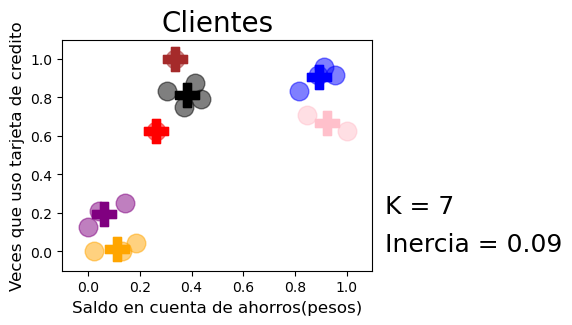

In [98]:
plt.figure(figsize=(4, 3), dpi=100)
colores= ["red", "blue", "orange", "black","purple", "pink", "brown"]

for cluster in range (kmeans.n_clusters):
  plt.scatter(clientes[clientes ["cluster"] == cluster] ["saldo"],
                      clientes[clientes ["cluster"] == cluster] ["transacciones"],
                      marker="o", s=180, color=colores[cluster], alpha=0.5
)

  plt.scatter(kmeans.cluster_centers_[cluster][0],
                      kmeans.cluster_centers_[cluster][1],
                       marker="P", s=280, color=colores[cluster], alpha=0.5)

  plt.scatter(kmeans.cluster_centers_[cluster][0],
                     kmeans.cluster_centers_[cluster][1],
                     marker="P", s=280, color=colores[cluster])


plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros(pesos)", fontsize=12)
plt.ylabel("Veces que uso tarjeta de credito", fontsize=12)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=18)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=18)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

del clientes["cluster"]



/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

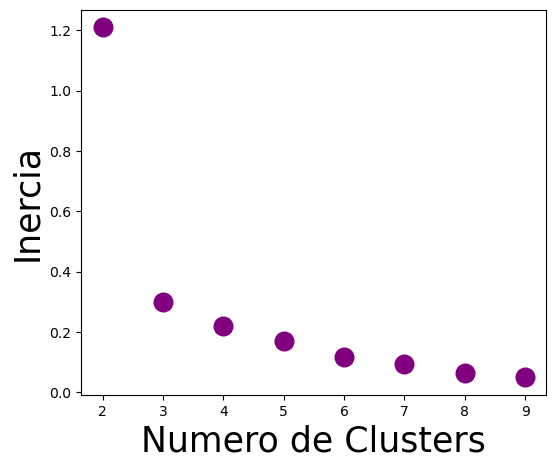

In [99]:
#Metodo del codo

#Calculo del numero de clusters (K)

inercias=[]

for k in range(2,10):
    kmeans= KMeans(n_clusters=k).fit(clientes.values)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6,5),dpi=100)
plt.scatter(range(2,10),inercias, marker="o", s=180, color = "purple")
plt.xlabel("Numero de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()